#                      Latent Dirichilet Allocation (LDA) using Gensim (Python)

### Lets quickly import pandas and get our data set to work on

* Here the news headline data set from Kaggle is used.
* It contains news headlines from last 17 years
* Such a data set is a good choice for topic modelling

In [1]:
import pandas as pd
df = pd.read_csv('abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [2]:
df.tail()

,publish_date,headline_text
1186013,20191231,vision of flames approaching corryong in victoria
1186014,20191231,wa police and government backflip on drug amne...
1186015,20191231,we have fears for their safety: victorian premier
1186016,20191231,when do the 20s start
1186017,20191231,yarraville shooting woman dead man critically ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1186018 non-null  int64 
 1   headline_text  1186018 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


In [4]:
df.shape

(1186018, 2)

In [5]:
data = df[['headline_text']]
data['index'] = data.index
document = data
data.head()

,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


## Lets Preprocess our data
* Tokenization
* Lower case the text
* get rid of the punctuations
* remove the stopwords
* lemmatization
* stemming

In [6]:
# Loading the necessary libraries

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer

from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kruti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [15]:
def lemm_stem(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos = 'v'))

In [12]:
def preprocess_text(text):
    result = []
    
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemm_stem(token))
            
    return result

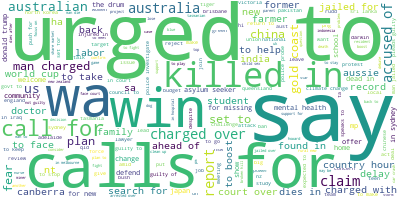

In [9]:
# I am gonna import the word cloud library
from wordcloud import WordCloud

# for creating a word cloud we need to pull all our text together
# I am gonna do that by joining all the processed_data together in a single variable
para = ','.join(list(data['headline_text'].values))

# Lets create an instance for word cloud 
wordcloud = WordCloud(background_color = 'white', 
                      max_words = 5000,
                      contour_width = 3, 
                      contour_color = 'steelblue')

# generate our word cloud
wordcloud.generate(para)

# Lets visualize it 
wordcloud.to_image()

### Lets check if lemmatization and stemming is working or not

In [16]:
doc = document[document['index'] == 4310].values[0][0]

print('Original Document: ')
words = []
for word in doc.split(' '):
    words.append(word)
    
print(words)

print('\n\n Tokenized and Lemmatized Document: ')
print(preprocess_text(doc))

Original Document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 Tokenized and Lemmatized Document: 
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']


In [17]:
doc = document[document['index'] == 1600].values[0][0]

print('Original Document: ')
words = []
for word in doc.split(' '):
    words.append(word)
    
print(words)

print('\n\n Tokenized and Lemmatized Document: ')
print(preprocess_text(doc))

Original Document: 
['man', 'missing', 'after', 'car', 'washed', 'into', 'victoria', 'river']


 Tokenized and Lemmatized Document: 
['miss', 'wash', 'victoria', 'river']


### This stemming and lemmatization seems to work okay

## Preprocess the entire headline text

In [19]:
processed_doc = document['headline_text'].map(preprocess_text)
processed_doc[:10]

0               [decid, commun, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

### Bag of words for the data

In [20]:
dictionary = gensim.corpora.Dictionary(processed_doc)

count = 0 
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 commun
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


### Filtering the data

In [21]:
dictionary.filter_extremes(no_below = 15, no_above = 0.5, keep_n = 100000)

In [22]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]
bow_corpus[4310]

[(162, 1), (240, 1), (292, 1), (589, 1), (839, 1), (3575, 1), (3576, 1)]

### Sample preview of the bag of words we created

In [23]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                                    dictionary[bow_doc_4310[i][0]],
                                                    bow_doc_4310[i][1]))

Word 162 ("govt") appears 1 time.
Word 240 ("group") appears 1 time.
Word 292 ("vote") appears 1 time.
Word 589 ("local") appears 1 time.
Word 839 ("want") appears 1 time.
Word 3575 ("compulsori") appears 1 time.
Word 3576 ("ratepay") appears 1 time.


### TF-IDF

In [24]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5860586362613176),
 (1, 0.3854657616151764),
 (2, 0.5006618583937537),
 (3, 0.5072367544211179)]


### LDA with BOW

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 10,
                                       id2word = dictionary,
                                       passes = 2,
                                       workers = 2)

In [26]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic : {} \nWords:{}'.format(idx, topic))

Topic : 0 
Words:0.026*"market" + 0.022*"school" + 0.015*"investig" + 0.015*"interview" + 0.014*"street" + 0.013*"fall" + 0.013*"student" + 0.011*"scott" + 0.011*"share" + 0.010*"bushfir"
Topic : 1 
Words:0.020*"donald" + 0.018*"plan" + 0.014*"canberra" + 0.013*"feder" + 0.013*"council" + 0.012*"speak" + 0.011*"water" + 0.011*"farm" + 0.010*"drum" + 0.010*"industri"
Topic : 2 
Words:0.038*"trump" + 0.025*"world" + 0.017*"australia" + 0.016*"open" + 0.015*"tasmania" + 0.014*"final" + 0.014*"australian" + 0.011*"break" + 0.011*"game" + 0.011*"record"
Topic : 3 
Words:0.029*"queensland" + 0.021*"help" + 0.017*"miss" + 0.016*"royal" + 0.015*"tasmanian" + 0.015*"bank" + 0.013*"report" + 0.013*"victoria" + 0.013*"commiss" + 0.011*"drought"
Topic : 4 
Words:0.023*"news" + 0.022*"women" + 0.021*"live" + 0.021*"warn" + 0.020*"coast" + 0.019*"health" + 0.016*"rural" + 0.016*"countri" + 0.016*"busi" + 0.013*"gold"
Topic : 5 
Words:0.054*"polic" + 0.050*"say" + 0.024*"kill" + 0.024*"attack" + 0.02

### Okay so now we have the relevant topics along with their weights

### LDA With TF-IDF

In [27]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics = 10, 
                                             id2word = dictionary, 
                                             passes = 2,
                                             workers = 4)

for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic : {} \nWords:{}'.format(idx, topic))

Topic : 0 
Words:0.028*"trump" + 0.018*"countri" + 0.013*"hour" + 0.006*"price" + 0.006*"financ" + 0.006*"rise" + 0.006*"august" + 0.006*"jam" + 0.006*"coal" + 0.006*"dollar"
Topic : 1 
Words:0.018*"charg" + 0.018*"murder" + 0.014*"polic" + 0.013*"court" + 0.011*"woman" + 0.010*"jail" + 0.010*"sentenc" + 0.009*"guilti" + 0.009*"shoot" + 0.009*"assault"
Topic : 2 
Words:0.009*"health" + 0.008*"govern" + 0.008*"chang" + 0.007*"climat" + 0.006*"farm" + 0.006*"fund" + 0.006*"scott" + 0.005*"farmer" + 0.005*"pacif" + 0.005*"budget"
Topic : 3 
Words:0.010*"interview" + 0.009*"turnbul" + 0.009*"wednesday" + 0.007*"driver" + 0.007*"truck" + 0.006*"energi" + 0.006*"teenag" + 0.006*"decemb" + 0.005*"malcolm" + 0.005*"asylum"
Topic : 4 
Words:0.012*"drum" + 0.011*"live" + 0.008*"search" + 0.008*"weather" + 0.008*"queensland" + 0.008*"tuesday" + 0.007*"coast" + 0.007*"sport" + 0.006*"miss" + 0.006*"peter"
Topic : 5 
Words:0.012*"stori" + 0.008*"david" + 0.008*"korea" + 0.008*"kill" + 0.007*"mark" 

### Lets see the performance of LDA with BOW

In [31]:
processed_doc[4310]

['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [30]:
for index, score in sorted(lda_model[bow_corpus[4310]], key = lambda tup:-1*tup[1]):
    print("\nScore : {}\t\nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score : 0.62055903673172	
Topic: 0.020*"donald" + 0.018*"plan" + 0.014*"canberra" + 0.013*"feder" + 0.013*"council" + 0.012*"speak" + 0.011*"water" + 0.011*"farm" + 0.010*"drum" + 0.010*"industri"

Score : 0.1489839106798172	
Topic: 0.014*"show" + 0.013*"liber" + 0.012*"morrison" + 0.012*"wall" + 0.012*"young" + 0.010*"station" + 0.010*"christma" + 0.010*"train" + 0.010*"beach" + 0.010*"research"

Score : 0.14290517568588257	
Topic: 0.023*"news" + 0.022*"women" + 0.021*"live" + 0.021*"warn" + 0.020*"coast" + 0.019*"health" + 0.016*"rural" + 0.016*"countri" + 0.016*"busi" + 0.013*"gold"

Score : 0.012509822845458984	
Topic: 0.020*"south" + 0.019*"adelaid" + 0.018*"north" + 0.014*"labor" + 0.014*"hospit" + 0.011*"west" + 0.011*"worker" + 0.010*"stori" + 0.010*"state" + 0.010*"polit"

Score : 0.012507057748734951	
Topic: 0.029*"queensland" + 0.021*"help" + 0.017*"miss" + 0.016*"royal" + 0.015*"tasmanian" + 0.015*"bank" + 0.013*"report" + 0.013*"victoria" + 0.013*"commiss" + 0.011*"drough

### Lets see the performance of LDA with TF-IDF

In [32]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key = lambda tup:-1*tup[1]):
    print("\nScore : {}\t\nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score : 0.5911136269569397	
Topic: 0.009*"health" + 0.008*"govern" + 0.008*"chang" + 0.007*"climat" + 0.006*"farm" + 0.006*"fund" + 0.006*"scott" + 0.005*"farmer" + 0.005*"pacif" + 0.005*"budget"

Score : 0.30884164571762085	
Topic: 0.018*"charg" + 0.018*"murder" + 0.014*"polic" + 0.013*"court" + 0.011*"woman" + 0.010*"jail" + 0.010*"sentenc" + 0.009*"guilti" + 0.009*"shoot" + 0.009*"assault"

Score : 0.012506759725511074	
Topic: 0.017*"donald" + 0.010*"christma" + 0.009*"elect" + 0.007*"liber" + 0.007*"parti" + 0.006*"extend" + 0.006*"resign" + 0.005*"territori" + 0.005*"interview" + 0.005*"polit"

Score : 0.012506043538451195	
Topic: 0.028*"trump" + 0.018*"countri" + 0.013*"hour" + 0.006*"price" + 0.006*"financ" + 0.006*"rise" + 0.006*"august" + 0.006*"jam" + 0.006*"coal" + 0.006*"dollar"

Score : 0.012505728751420975	
Topic: 0.014*"royal" + 0.011*"commiss" + 0.009*"abus" + 0.008*"sexual" + 0.007*"michael" + 0.007*"grow" + 0.006*"disabl" + 0.006*"money" + 0.006*"insid" + 0.005*"roun

## Finally, lets see how our model works with unseen docs

In [35]:
# this is some global warming realted text that I took from Wikepedia
unseen = '''The rising average temperature of Earth's climate system, 
            called global warming, is driving changes in rainfall patterns, 
            extreme weather, arrival of seasons, and more. 
            Collectively, global warming and its effects are known as climate change. 
            While there have been prehistoric periods of global warming, 
            observed changes since the mid-20th century have been unprecedented in rate and scale.'''

bow_vector = dictionary.doc2bow(preprocess_text(unseen))

print("\nLDA WITH BOW:")
for index, score in sorted(lda_model[bow_vector], key = lambda tup:-1*tup[1]):
    print("\nScore : {}\t\nTopic: {}".format(score, lda_model.print_topic(index, 10)))

print("\n=====================================================================================================================")

print("\nLDA WITH TF-IDF:")
for index, score in sorted(lda_model_tfidf[bow_vector], key = lambda tup:-1*tup[1]):
    print("\nScore : {}\t\nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


LDA WITH BOW:

Score : 0.3063643276691437	
Topic: 0.054*"polic" + 0.050*"say" + 0.024*"kill" + 0.024*"attack" + 0.021*"crash" + 0.018*"die" + 0.018*"shoot" + 0.017*"perth" + 0.014*"woman" + 0.014*"arrest"

Score : 0.20126469433307648	
Topic: 0.045*"australia" + 0.035*"elect" + 0.032*"govern" + 0.025*"china" + 0.012*"rise" + 0.012*"million" + 0.011*"citi" + 0.011*"trade" + 0.011*"presid" + 0.010*"deal"

Score : 0.11266185343265533	
Topic: 0.014*"show" + 0.013*"liber" + 0.012*"morrison" + 0.012*"wall" + 0.012*"young" + 0.010*"station" + 0.010*"christma" + 0.010*"train" + 0.010*"beach" + 0.010*"research"

Score : 0.09393458813428879	
Topic: 0.023*"news" + 0.022*"women" + 0.021*"live" + 0.021*"warn" + 0.020*"coast" + 0.019*"health" + 0.016*"rural" + 0.016*"countri" + 0.016*"busi" + 0.013*"gold"

Score : 0.09324795007705688	
Topic: 0.026*"market" + 0.022*"school" + 0.015*"investig" + 0.015*"interview" + 0.014*"street" + 0.013*"fall" + 0.013*"student" + 0.011*"scott" + 0.011*"share" + 0.010

## This is pretty much it!